# Restaurant Food Cost

Project Description

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places 
where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor 
that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, 
you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your 
Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very
interesting insights that might help you choose what to eat and from where.

You are provided with following 2 files:
    
1.     train.csv : Use this dataset to train the model. This file contains all the details related to restaurant food cost 
       as well as the target variable “cost”. You have to train your model using this file.

2.     test.csv : Use the trained model to predict the cost of a two person meal.

Dataset Attributes

TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

RESTAURANT_ID: A unique ID for each restaurant.

CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.

RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

COST: The average cost of a two-person meal.

Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Restaurant%20Food%20Cost

•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Test.xlsx
•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Train.xlsx


In [531]:
# importing necessory libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [532]:
# download data file in local system
train = pd.read_excel(r'C:\Assignements & HW\Internship\project1\Data_Train.xlsx')
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [533]:
train.shape

(12690, 9)

In [534]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [535]:
#check null values
train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [536]:
train.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [537]:
# download data file in local system
test = pd.read_excel(r'C:\Assignements & HW\Internship\project1\Data_Test.xlsx')
test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [538]:
test.shape

(4231, 8)

In [539]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [540]:
test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [541]:
test.describe()

,RESTAURANT_ID
count,4231.000000
mean,7791.438431
std,4458.797621
min,3.000000
25%,3908.500000
50%,7798.000000
75%,11634.000000
max,15572.000000


In [542]:
train.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [543]:
train.corr()

,RESTAURANT_ID,COST
RESTAURANT_ID,1.00000,0.04071
COST,0.04071,1.00000


In [544]:
test.corr()

,RESTAURANT_ID
RESTAURANT_ID,1.0


In [545]:
train.TITLE.unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR'

In [546]:
len(train.TITLE.unique())

113

In [547]:
train.nunique().to_frame(" Number of unique value ")

,Number of unique value
TITLE,113
RESTAURANT_ID,11892
CUISINES,4155
TIME,2689
CITY,359
LOCALITY,1416
RATING,32
VOTES,1847
COST,86


In [548]:
# Create a function for all rows
def show_all_rows(x):
    pd.set_option('display.max_row', None)
    i=0
    while i==0:
        print(x)
        i=1
    pd.reset_option('display.max_rows')

In [549]:
show_all_rows(train.TITLE.value_counts())

QUICK BITES                     4218
CASUAL DINING                   3652
None                            1003
CAFÉ                             607
DESSERT PARLOR                   382
CASUAL DINING,BAR                349
FINE DINING                      308
BAKERY                           302
BEVERAGE SHOP                    156
BAR,CASUAL DINING                128
LOUNGE                            98
BAKERY,QUICK BITES                92
BAR                               91
FOOD COURT                        78
CASUAL DINING,CAFÉ                56
MESS                              53
KIOSK                             53
BAKERY,DESSERT PARLOR             51
PUB                               50
SWEET SHOP,QUICK BITES            48
DESSERT PARLOR,QUICK BITES        48
DHABA                             45
SWEET SHOP                        44
QUICK BITES,SWEET SHOP            35
CAFÉ,CASUAL DINING                35
BEVERAGE SHOP,QUICK BITES         33
CAFÉ,DESSERT PARLOR               32
F

In [550]:
train.TITLE.value_counts()

QUICK BITES                 4218
CASUAL DINING               3652
None                        1003
CAFÉ                         607
DESSERT PARLOR               382
                            ... 
QUICK BITES,BAR                1
MEAT SHOP                      1
SWEET SHOP,CONFECTIONERY       1
BEVERAGE SHOP,FOOD COURT       1
BAR,MICROBREWERY               1
Name: TITLE, Length: 113, dtype: int64

In [551]:
# combine all dining rows
dining_title = train[train.TITLE.str.contains('DINING')].TITLE.value_counts().index
dining_title

Index(['CASUAL DINING', 'CASUAL DINING,BAR', 'FINE DINING',
       'BAR,CASUAL DINING', 'CASUAL DINING,CAFÉ', 'CAFÉ,CASUAL DINING',
       'FINE DINING,BAR', 'PUB,CASUAL DINING', 'LOUNGE,CASUAL DINING',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,PUB',
       'CASUAL DINING,LOUNGE', 'CASUAL DINING,MICROBREWERY',
       'FINE DINING,LOUNGE', 'BAR,FINE DINING', 'CASUAL DINING,BAKERY',
       'CASUAL DINING,SWEET SHOP', 'QUICK BITES,CASUAL DINING',
       'CASUAL DINING,IRANI CAFE', 'COCKTAIL BAR,CASUAL DINING',
       'CASUAL DINING,CLUB', 'SWEET SHOP,CASUAL DINING', 'FINE DINING,CAFÉ',
       'CASUAL DINING,FOOD COURT', 'BEVERAGE SHOP,CASUAL DINING',
       'CASUAL DINING,DESSERT PARLOR', 'LOUNGE,FINE DINING',
       'CAFÉ,FINE DINING'],
      dtype='object')

In [552]:
train_clean = train.copy()

In [553]:
train_clean.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [554]:
train_clean.TITLE.replace(to_replace=dining_title,value='CASUAL DINING',inplace=True)

In [555]:
train_clean.TITLE.value_counts()

CASUAL DINING             4737
QUICK BITES               4218
None                      1003
CAFÉ                       607
DESSERT PARLOR             382
                          ... 
CLUB,MICROBREWERY            1
MEAT SHOP                    1
BAKERY,BEVERAGE SHOP         1
QUICK BITES,FOOD TRUCK       1
BAR,MICROBREWERY             1
Name: TITLE, Length: 86, dtype: int64

In [556]:
# combine all rows of bites
train_clean[train_clean.TITLE.str.contains('BITES')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101 votes,300
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219 votes,200
11,"QUICK BITES,BEVERAGE SHOP",844,"Fast Food, Burger, Beverages","11am – 12:15AM (Mon, Tue, Wed, Thu, Fri, Sun)...",Bangalore,Indiranagar,4.0,274 votes,800
14,QUICK BITES,15024,Maharashtrian,"Closed (Mon),11am – 11pm (Tue-Sun)",Thane West,Majiwada,4.0,160 votes,300
...,...,...,...,...,...,...,...,...,...
12679,QUICK BITES,6648,"Italian, Mediterranean",12:30pm – 9:45pm (Mon-Sun),Gurgaon,DLF Phase 3,4.3,68 votes,650
12680,QUICK BITES,13798,"North Indian, Fast Food, Desserts",10am – 11pm (Mon-Sun),New Delhi,Near Malviya Nagar,3.4,13 votes,300
12682,QUICK BITES,8085,Fast Food,11am – 11pm (Mon-Sun),Chennai.,Mogappair,3.6,30 votes,450
12683,"QUICK BITES,SWEET SHOP",5430,"North Indian, South Indian, Street Food, Mithai",8:30am – 11pm (Mon-Sun),New Delhi,Pitampura,4.1,1426 votes,500


In [557]:
BITES_title = train[train.TITLE.str.contains('BITES')].TITLE.value_counts().index
BITES_title

Index(['QUICK BITES', 'BAKERY,QUICK BITES', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,QUICK BITES', 'QUICK BITES,SWEET SHOP',
       'BEVERAGE SHOP,QUICK BITES', 'QUICK BITES,DESSERT PARLOR',
       'CAFÉ,QUICK BITES', 'QUICK BITES,BAKERY', 'QUICK BITES,BEVERAGE SHOP',
       'FOOD COURT,QUICK BITES', 'QUICK BITES,FOOD COURT', 'QUICK BITES,CAFÉ',
       'QUICK BITES,CASUAL DINING', 'QUICK BITES,KIOSK',
       'MEAT SHOP,QUICK BITES', 'KIOSK,QUICK BITES', 'QUICK BITES,BAR',
       'QUICK BITES,FOOD TRUCK', 'CONFECTIONERY,QUICK BITES'],
      dtype='object')

In [558]:
len(BITES_title)

20

In [559]:
train_clean.TITLE.replace(to_replace=BITES_title,value='QUICK BITES',inplace=True)

In [560]:
train_clean.TITLE.value_counts()

CASUAL DINING           4737
QUICK BITES             4594
None                    1003
CAFÉ                     607
DESSERT PARLOR           382
                        ... 
CLUB,MICROBREWERY          1
BAKERY,BEVERAGE SHOP       1
MEAT SHOP                  1
BAKERY,FOOD COURT          1
BAR,MICROBREWERY           1
Name: TITLE, Length: 68, dtype: int64

In [561]:
# combine all cafe rows
train_clean[train_clean.TITLE.str.contains('CAF')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600
24,CAFÉ,2389,"Cafe, Italian, Chinese",11am – 11pm (Mon-Sun),New Delhi,Dwarka,4.2,493 votes,700
31,CAFÉ,2802,"Cafe, Tea","8am – 11pm (Mon-Fri),8am – 7pm (Sat),Closed (Sun)",Gurgaon,DLF Cyber City,4.0,546 votes,500
32,CAFÉ,7836,"Cafe, Continental, European, American, Healthy...",10am – 12midnight (Mon-Sun),Andheri West,Versova,4.0,2228 votes,1200
37,CAFÉ,4455,"Cafe, Healthy Food",8:30am – 11pm (Mon-Sun),Bangalore,MG Road,4.3,69 votes,800
...,...,...,...,...,...,...,...,...,...
12619,CAFÉ,2339,"Cafe, Bakery, Arabian, Fast Food",8am – 11:30pm (Mon-Sun),Chennai,Anna Nagar East,4.3,589 votes,700
12631,CAFÉ,2446,Cafe,11am – 10:30pm (Mon-Sun),Chennai,Abhiramapuram,3.4,19 votes,400
12633,CAFÉ,9073,"Cafe, Continental, Burger, Arabian, Juices, Be...",11:30am – 12midnight (Mon-Sun),Chennai,OMR Padur,3.3,18 votes,500
12667,CAFÉ,2663,"Cafe, North Indian, Momos","Closed (Mon),10am – 11pm (Tue-Sun)",Gurgaon,Sector 23,3.9,146 votes,550


In [562]:
train_clean[train_clean.TITLE.str.contains('CAF')].TITLE.value_counts()

CAFÉ                   607
CAFÉ,DESSERT PARLOR     32
CAFÉ,BAKERY             29
CAFÉ,BAR                17
BAKERY,CAFÉ             13
DESSERT PARLOR,CAFÉ      8
BAR,CAFÉ                 4
CAFÉ,BEVERAGE SHOP       4
BEVERAGE SHOP,CAFÉ       3
LOUNGE,CAFÉ              2
PUB,CAFÉ                 1
CAFÉ,LOUNGE              1
Name: TITLE, dtype: int64

In [563]:
cafe_title = train[train.TITLE.str.contains('CAF')].TITLE.value_counts().index


In [564]:
cafe_title

Index(['CAFÉ', 'CASUAL DINING,CAFÉ', 'CAFÉ,CASUAL DINING',
       'CAFÉ,DESSERT PARLOR', 'CAFÉ,BAKERY', 'CAFÉ,QUICK BITES', 'CAFÉ,BAR',
       'BAKERY,CAFÉ', 'DESSERT PARLOR,CAFÉ', 'QUICK BITES,CAFÉ',
       'CAFÉ,BEVERAGE SHOP', 'BAR,CAFÉ', 'CASUAL DINING,IRANI CAFE',
       'BEVERAGE SHOP,CAFÉ', 'LOUNGE,CAFÉ', 'FINE DINING,CAFÉ', 'PUB,CAFÉ',
       'CAFÉ,LOUNGE', 'CAFÉ,FINE DINING'],
      dtype='object')

In [565]:
len(cafe_title)

19

In [566]:
train_clean.TITLE.replace(to_replace=cafe_title,value='CAFE',inplace=True)

In [567]:
train_clean.TITLE.value_counts()

CASUAL DINING                   4737
QUICK BITES                     4594
None                            1003
CAFE                             721
DESSERT PARLOR                   382
BAKERY                           302
BEVERAGE SHOP                    156
LOUNGE                            98
BAR                               91
FOOD COURT                        78
MESS                              53
KIOSK                             53
BAKERY,DESSERT PARLOR             51
PUB                               50
DHABA                             45
SWEET SHOP                        44
FOOD TRUCK                        30
BEVERAGE SHOP,DESSERT PARLOR      21
CLUB                              20
LOUNGE,BAR                        19
BAR,LOUNGE                        16
PUB,MICROBREWERY                  14
DESSERT PARLOR,BAKERY             12
DESSERT PARLOR,BEVERAGE SHOP      11
DESSERT PARLOR,SWEET SHOP         11
MICROBREWERY                       8
BAR,PUB                            7
M

In [568]:
# combine dessert 
train_clean[train_clean.TITLE.str.contains('DESSERT')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
49,DESSERT PARLOR,3378,"Ice Cream, Desserts","11am – 11pm (Mon, Tue, Wed, Thu, Sun), 11am –...",Bangalore,Whitefield,4.3,518 votes,400
64,"BEVERAGE SHOP,DESSERT PARLOR",8750,"Beverages, Desserts",12noon – 12:30AM (Mon-Sun),Mumbai,Mazgaon,3.7,69 votes,300
75,"DESSERT PARLOR,SWEET SHOP",8155,"Desserts, Mithai",8:30am – 10pm (Mon-Sun),Hyderabad,Dilsukhnagar,3.5,101 votes,200
82,"BAKERY,DESSERT PARLOR",5684,"Bakery, Desserts, Healthy Food",10am – 8pm (Mon-Sun),Bandra West,Pali Hill,4.0,545 votes,500
...,...,...,...,...,...,...,...,...,...
12544,DESSERT PARLOR,2950,"Desserts, Bakery",10am – 11:30pm (Mon-Sun),New Delhi,Vivek Vihar,3.8,36 votes,300
12639,"DESSERT PARLOR,FOOD COURT",7610,"Ice Cream, Desserts",10am – 11pm (Mon-Sun),Hyderabad,Hitech City,3.6,98 votes,150
12647,DESSERT PARLOR,9025,"Desserts, Ice Cream",2pm – 10pm (Mon-Sun),Hyderabad,Moti Nagar,3.3,69 votes,200
12674,"DESSERT PARLOR,BEVERAGE SHOP",13358,"Desserts, Beverages",11:30am – 1am (Mon-Sun),Hyderabad,Gachibowli,4.3,590 votes,350


In [569]:
DES_title = train[train.TITLE.str.contains('DESSERT')].TITLE.value_counts().index
DES_title

Index(['DESSERT PARLOR', 'BAKERY,DESSERT PARLOR', 'DESSERT PARLOR,QUICK BITES',
       'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR',
       'BEVERAGE SHOP,DESSERT PARLOR', 'DESSERT PARLOR,BAKERY',
       'DESSERT PARLOR,SWEET SHOP', 'DESSERT PARLOR,BEVERAGE SHOP',
       'DESSERT PARLOR,CAFÉ', 'DESSERT PARLOR,FOOD COURT',
       'SWEET SHOP,DESSERT PARLOR', 'FOOD COURT,DESSERT PARLOR',
       'DESSERT PARLOR,PAAN SHOP', 'DESSERT PARLOR,KIOSK',
       'CASUAL DINING,DESSERT PARLOR'],
      dtype='object')

In [570]:
len(DES_title)

16

In [571]:
train_clean.TITLE.replace(to_replace=DES_title,value='DESSERT PARLOUR',inplace=True)

In [572]:
train_clean.TITLE.value_counts()

CASUAL DINING               4737
QUICK BITES                 4594
None                        1003
CAFE                         721
DESSERT PARLOUR              501
BAKERY                       302
BEVERAGE SHOP                156
LOUNGE                        98
BAR                           91
FOOD COURT                    78
KIOSK                         53
MESS                          53
PUB                           50
DHABA                         45
SWEET SHOP                    44
FOOD TRUCK                    30
CLUB                          20
LOUNGE,BAR                    19
BAR,LOUNGE                    16
PUB,MICROBREWERY              14
MICROBREWERY                   8
BAR,PUB                        7
MICROBREWERY,BAR               4
MICROBREWERY,PUB               4
PUB,LOUNGE                     4
PUB,BAR                        4
PAAN SHOP                      4
COCKTAIL BAR                   3
LOUNGE,PUB                     3
LOUNGE,CLUB                    2
LOUNGE,MIC

In [573]:
def figof_size(x,y):
    return plt.figure(figsize=(x,y))

<Axes: xlabel='TITLE', ylabel='COST'>

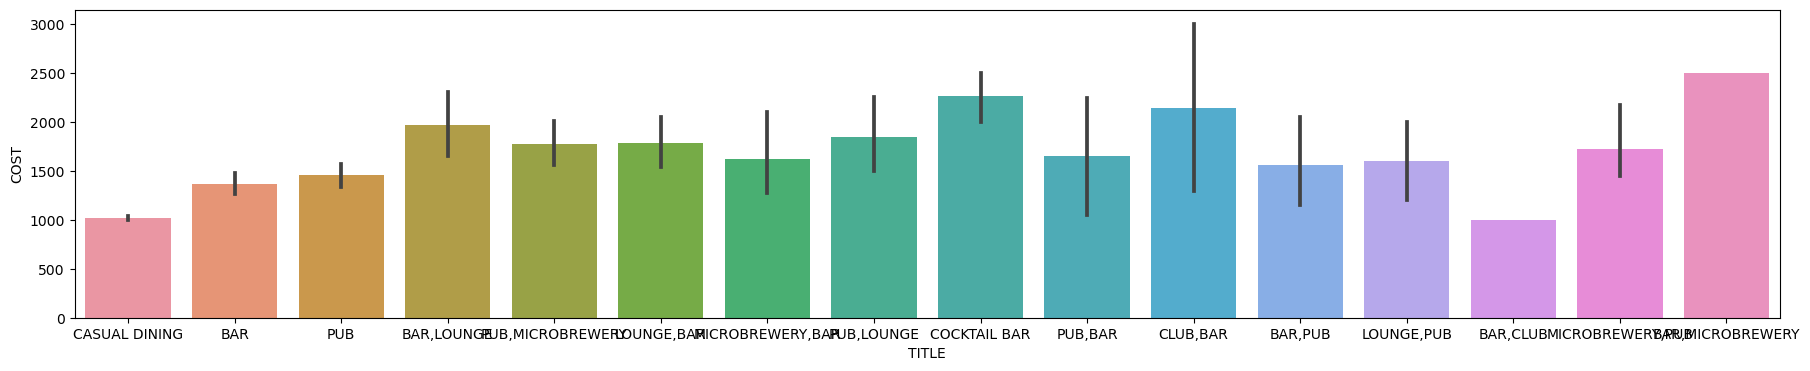

In [574]:
# visualize the features and target variable
figof_size(22,4)
sns.barplot(x='TITLE', y='COST', data=train_clean[train_clean.TITLE.str.contains('PUB|BAR|CASUAL DINING')])

In [575]:
train_clean[train_clean.TITLE.str.contains('CASUAL DINING')]['CUISINES'].unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'BBQ, Arabian, North Indian, Biryani',
       'Salad, Healthy Food, Juices', 'Goan, Continental'], dtype=object)

In [576]:
train_clean[train_clean.TITLE.str.contains('BAR')]['CUISINES'].unique()

array(['Finger Food, North Indian, Continental, Italian',
       'North Indian, Chinese', 'Italian, Continental, Chinese, American',
       'North Indian, Chinese, Andhra',
       'Finger Food, American, Asian, Italian', 'Finger Food',
       'North Indian, Continental, Italian',
       'Continental, Finger Food, South Indian, North Indian, Chinese, Beverages',
       'Finger Food, Asian, Beverages, Chinese, Continental, Italian, North Indian',
       'American, North Indian, Pizza, Finger Food, Continental, Italian',
       'American, Italian, Mexican, Continental',
       'Chinese, Continental, Finger Food, North Indian, Italian, Mexican, ,',
       'Continental, North Indian, Chinese',
       'North Indian, South Indian, Chinese, Continental',
       'Continental, Chinese', 'Finger Food, Seafood', 'Continental',
       'Continental, South Indian, North Indian, Chinese, Finger Food',
       'Finger Food, Salad, Drinks Only, Steak',
       'American, Mexican, Italian', 'Bar Food, Nort

In [577]:
train_clean[train_clean.TITLE.str.contains('PUB')]['CUISINES'].unique()

array(['Finger Food, Continental, Asian, North Indian',
       'Finger Food, North Indian',
       'Continental, Chinese, Asian, Italian, Pizza',
       'Russian, Continental, North Indian', 'Bar Food, North Indian',
       'Finger Food',
       'Finger Food, Continental, Mexican, Burger, American, Desserts,',
       'Finger Food, Continental', 'North Indian, Chinese, Continental',
       'Asian, Continental, European',
       'Continental, Burger, Italian, Pizza, North Indian, Salad',
       'Continental, Italian, North Indian, Finger Food, German',
       'Chinese, South Indian', 'Bar Food', 'Continental, Fast Food',
       'Continental, American, Tex-Mex, North Indian',
       'Finger Food, Italian, Continental',
       'Mediterranean, Mexican, North Indian, American',
       'Continental, North Indian, Chinese, Italian',
       'American, Continental',
       'Continental, Finger Food, Pizza, North Indian, Bar Food',
       'American, Continental, North Indian, Mediterranean',
    

In [578]:
train_clean[train_clean.TITLE.str.contains('PUB|BAR')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
28,BAR,4222,"Finger Food, North Indian, Continental, Italian",11am – 11pm (Mon-Sun),Chennai,Neelangarai,4.3,150 votes,1000
29,PUB,6577,"Finger Food, Continental, Asian, North Indian",12:30pm – 1am (Mon-Sun),Bangalore,Koramangala 5th Block,4.2,2456 votes,1400
99,BAR,13495,"North Indian, Chinese","11am – 12midnight (Mon-Thu),11am – 1am (Fri-Sun)",Bangalore,Koramangala 1st Block,3.7,23 votes,800
125,"BAR,LOUNGE",4214,"Italian, Continental, Chinese, American",12noon – 1am (Mon-Sun),New Delhi,Connaught Place,4.3,1293 votes,1600
280,BAR,2982,"North Indian, Chinese, Andhra",12:30pm – 11pm (Mon-Sun),Hyderabad,Kothapet,3.6,510 votes,1000
...,...,...,...,...,...,...,...,...,...
12360,"MICROBREWERY,PUB",2129,"Continental, North Indian, BBQ, Steak","12:30pm – 11:30pm (Mon-Tue),12:30pm – 1am...",Bangalore,Marathahalli,4.5,6086 votes,1400
12397,PUB,15201,"Finger Food, Asian, European, Italian",12noon – 12:30AM (Mon-Sun),Bangalore,Koramangala 5th Block,4.1,1839 votes,1200
12426,BAR,9090,"Continental, North Indian",5:30pm – 1:30am (Mon-Sun),Bandra West,Reclamation,2.9,193 votes,4000
12609,"BAR,MICROBREWERY",14434,"European, Asian","Closed (Mon),6pm – 1am (Tue-Sun)",Mumbai,Lower Parel,4.4,91 votes,2500


In [579]:
bar_title = train_clean[train_clean.TITLE.str.contains('BAR|PUB')].TITLE.value_counts().index

In [580]:
bar_title

Index(['BAR', 'PUB', 'LOUNGE,BAR', 'BAR,LOUNGE', 'PUB,MICROBREWERY', 'BAR,PUB',
       'MICROBREWERY,BAR', 'PUB,LOUNGE', 'PUB,BAR', 'MICROBREWERY,PUB',
       'COCKTAIL BAR', 'LOUNGE,PUB', 'CLUB,BAR', 'BAR,CLUB',
       'BAR,MICROBREWERY'],
      dtype='object')

In [581]:
train_clean.TITLE.replace(to_replace=bar_title, value='BAR_PUB', inplace=True)

In [582]:
train_clean.TITLE.value_counts()

CASUAL DINING               4737
QUICK BITES                 4594
None                        1003
CAFE                         721
DESSERT PARLOUR              501
BAKERY                       302
BAR_PUB                      223
BEVERAGE SHOP                156
LOUNGE                        98
FOOD COURT                    78
KIOSK                         53
MESS                          53
DHABA                         45
SWEET SHOP                    44
FOOD TRUCK                    30
CLUB                          20
MICROBREWERY                   8
PAAN SHOP                      4
BAKERY,SWEET SHOP              2
SWEET SHOP,BAKERY              2
LOUNGE,CLUB                    2
LOUNGE,MICROBREWERY            2
CONFECTIONERY                  2
BAKERY,FOOD COURT              1
BAKERY,BEVERAGE SHOP           1
BAKERY,CONFECTIONERY           1
MEAT SHOP                      1
CLUB,MICROBREWERY              1
MICROBREWERY,LOUNGE            1
SWEET SHOP,CONFECTIONERY       1
SWEET SHOP

In [583]:
# combine all the rows of beverage in a single rows
train_clean[train_clean.TITLE.str.contains('BEVERAGE')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
34,BEVERAGE SHOP,1494,"Beverages, Coffee, Tea",6am – 11pm (Mon-Sun),Chennai,Besant Nagar,2.7,132 votes,500
78,BEVERAGE SHOP,7739,Beverages,10am – 11pm (Mon-Sun),Bangalore,Kengeri,3.9,8 votes,150
101,BEVERAGE SHOP,13927,"Juices, Fast Food, Sandwich, Beverages","10am – 10pm (Mon),9:30am – 10pm (Tue),9:30am –...",Chennai,Poonamalle,3.4,19 votes,250
130,BEVERAGE SHOP,4940,"Beverages, Desserts, Ice Cream",11am – 1:30am (Mon-Sun),Andheri West,Shastri Nagar - Lokhandwala,4.2,317 votes,200
176,BEVERAGE SHOP,2680,Juices,9:30am – 10:30pm (Mon-Sun),Bangalore,Jayanagar,4.1,88 votes,100
...,...,...,...,...,...,...,...,...,...
12226,BEVERAGE SHOP,7747,"Beverages, Juices",12noon – 12midnight (Mon-Sun),Hyderabad,Tolichowki,3.8,45 votes,150
12239,BEVERAGE SHOP,11915,"Beverages, Fast Food",11am – 11pm (Mon-Sun),New Delhi,Yusuf Sarai,4.0,67 votes,300
12307,BEVERAGE SHOP,3479,Beverages,10am – 12midnight (Mon-Sun),Hyderabad,Banjara Hills,3.6,139 votes,250
12421,BEVERAGE SHOP,2677,"Juices, Beverages",9am – 10pm (Mon-Sun),Chennai,Velachery,4.0,70 votes,200


In [584]:
bev_title = train_clean[train_clean.TITLE.str.contains('BEVERAGE')].TITLE.value_counts().index

In [585]:
bev_title

Index(['BEVERAGE SHOP', 'BEVERAGE SHOP,FOOD COURT', 'BAKERY,BEVERAGE SHOP',
       'SWEET SHOP,BEVERAGE SHOP'],
      dtype='object')

In [586]:
train_clean.TITLE.value_counts()

CASUAL DINING               4737
QUICK BITES                 4594
None                        1003
CAFE                         721
DESSERT PARLOUR              501
BAKERY                       302
BAR_PUB                      223
BEVERAGE SHOP                156
LOUNGE                        98
FOOD COURT                    78
KIOSK                         53
MESS                          53
DHABA                         45
SWEET SHOP                    44
FOOD TRUCK                    30
CLUB                          20
MICROBREWERY                   8
PAAN SHOP                      4
BAKERY,SWEET SHOP              2
SWEET SHOP,BAKERY              2
LOUNGE,CLUB                    2
LOUNGE,MICROBREWERY            2
CONFECTIONERY                  2
BAKERY,FOOD COURT              1
BAKERY,BEVERAGE SHOP           1
BAKERY,CONFECTIONERY           1
MEAT SHOP                      1
CLUB,MICROBREWERY              1
MICROBREWERY,LOUNGE            1
SWEET SHOP,CONFECTIONERY       1
SWEET SHOP

In [587]:
train_clean[train_clean.TITLE.str.contains('BAKERY|CONFECTIONERY|SWEET SHOP')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
76,BAKERY,2646,"Bakery, Desserts",10am – 1am (Mon-Sun),Hyderabad,Gachibowli,3.1,145 votes,300
100,BAKERY,4933,"Bakery, Desserts",9am – 11pm (Mon-Sun),Chennai,Anna Nagar East,3.8,66 votes,400
108,BAKERY,7776,"Bakery, Desserts, Beverages",7am – 12midnight (Mon-Sun),Bangalore,BTM,4.0,17 votes,450
124,BAKERY,2633,"Bakery, Desserts",9am – 12midnight (Mon-Sun),Mumbai,Jogeshwari,3.3,6 votes,400
149,BAKERY,2641,Bakery,10am – 11pm (Mon-Sun),Madhuranagar,Behind Allahabad Bank,3.5,32 votes,300
...,...,...,...,...,...,...,...,...,...
12458,SWEET SHOP,391,"Mithai, Bakery",9am – 10:30pm (Mon-Sun),Hyderabad,Charminar,3.6,43 votes,350
12481,BAKERY,3808,"Bakery, Desserts",10am – 11:30pm (Mon-Sun),Mumbai,Khar,4.0,246 votes,400
12495,BAKERY,6889,Bakery,10:30am – 11pm (Mon-Sun),Near Jyothinivas College,5th A Block,3.8,125 votes,400
12508,BAKERY,2760,"Bakery, Desserts",10am – 11pm (Mon-Sun),Mumbai,Santacruz West,3.9,293 votes,250


In [588]:
bakery_title = train_clean[train_clean.TITLE.str.contains('BAKERY|CONFECTIONERY|SWEET SHOP')].TITLE.value_counts().index

In [589]:
bakery_title

Index(['BAKERY', 'SWEET SHOP', 'CONFECTIONERY', 'BAKERY,SWEET SHOP',
       'SWEET SHOP,BAKERY', 'BAKERY,CONFECTIONERY', 'SWEET SHOP,CONFECTIONERY',
       'BAKERY,FOOD COURT', 'BAKERY,BEVERAGE SHOP',
       'SWEET SHOP,BEVERAGE SHOP'],
      dtype='object')

In [590]:
train_clean.TITLE.replace(to_replace=bakery_title,value='BAKERY_SWEETS',inplace=True)

In [591]:
train_clean.TITLE.value_counts()

CASUAL DINING               4737
QUICK BITES                 4594
None                        1003
CAFE                         721
DESSERT PARLOUR              501
BAKERY_SWEETS                357
BAR_PUB                      223
BEVERAGE SHOP                156
LOUNGE                        98
FOOD COURT                    78
MESS                          53
KIOSK                         53
DHABA                         45
FOOD TRUCK                    30
CLUB                          20
MICROBREWERY                   8
PAAN SHOP                      4
LOUNGE,CLUB                    2
LOUNGE,MICROBREWERY            2
CLUB,MICROBREWERY              1
MICROBREWERY,LOUNGE            1
MEAT SHOP                      1
KIOSK,FOOD COURT               1
BEVERAGE SHOP,FOOD COURT       1
Name: TITLE, dtype: int64

In [592]:
train_clean[train_clean.TITLE.str.contains('FOOD COURT')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
133,FOOD COURT,5171,Desserts,11am – 11pm (Mon-Sun),Hyderabad,Hitech City,3.8,52 votes,180
222,FOOD COURT,12024,"Hyderabadi, Biryani","7am – 3am (Mon-Fri),12noon – 3am (Sat-Sun)",Hyderabad,Madhapur,3.5,103 votes,300
253,"BEVERAGE SHOP,FOOD COURT",6840,Juices,11am – 10pm (Mon-Sun),Kochi,Edappally,-,NaN,150
470,FOOD COURT,15108,"Tibetan, Momos",11am – 11pm (Mon-Sun),Bangalore,Whitefield,3.6,67 votes,400
1037,FOOD COURT,10040,South Indian,10am – 10pm (Mon-Sun),Chennai,Vadapalani,3.4,47 votes,500
...,...,...,...,...,...,...,...,...,...
11642,FOOD COURT,6305,"Continental, Fast Food",8am – 11pm (Mon-Sun),Bangalore,Whitefield,3.9,85 votes,500
12052,FOOD COURT,3962,North Indian,11am – 11pm (Mon-Sun),Hyderabad,3rd Floor Sujana Mall Kukatpally,3.8,31 votes,1000
12129,FOOD COURT,13667,Chinese,11am – 11:55pm (Mon-Sun),Secunderabad,Uppal,3.0,86 votes,400
12194,FOOD COURT,11400,Street Food,"12:5pm – 11:56pm (Mon),12:5pm – 11:55pm...",Secunderabad,Uppal,2.9,221 votes,200


In [593]:
train_clean[train_clean.TITLE.str.contains('DHABA')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
515,DHABA,1663,North Indian,7:30am – 11pm (Mon-Sun),Faridabad,NIT,3.6,77 votes,500
647,DHABA,13537,"Bihari, North Indian","12noon – 3:30pm, 6:30pm – 10:30pm (Mon-Sun)",Chennai,Velachery,3.6,60 votes,300
2101,DHABA,8838,North Indian,"10am – 4pm, 7pm – 11pm (Mon-Sun)",New Delhi,Shahdara,3.7,323 votes,300
2421,DHABA,10636,North Indian,12noon – 1am (Mon-Sun),Bangalore,Majestic,3.7,81 votes,350
2532,DHABA,6939,"Chinese, North Indian",12noon – 11:30pm (Mon-Sun),New Delhi,Rajouri Garden,3.9,145 votes,600
2616,DHABA,3929,"North Indian, Chinese, Biryani, BBQ",10am – 1am (Mon-Sun),Gurgaon,Udyog Vihar,3.8,511 votes,200
3001,DHABA,9534,North Indian,10:30am – 11pm (Mon-Sun),Gurgaon,Sector 7,3.7,25 votes,200
3179,DHABA,1395,"North Indian, Chinese",11:30am – 11pm (Mon-Sun),Secunderabad,Sainikpuri,3.7,340 votes,400
3474,DHABA,3903,North Indian,11am – 4am (Mon-Sun),Gurgaon,Sector 29,4.6,380 votes,1100
3600,DHABA,10759,North Indian,11am – 1am (Mon-Sun),Mumbai,Sion,3.8,118 votes,120


In [594]:
train_clean[train_clean.TITLE.str.contains('LOUNGE')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
147,LOUNGE,12989,"Continental, North Indian, Chinese, Finger Food",12noon – 12midnight (Mon-Sun),New Delhi,Rajouri Garden,4.2,481 votes,1100
171,LOUNGE,14908,"Pizza, Continental",5pm – 12midnight (Mon-Sun),Chennai,Ramapuram,3.9,71 votes,1200
195,LOUNGE,6827,"North Indian, Chinese, Continental, Italian",11am – 1am (Mon-Sun),New Delhi,Vijay Nagar,4.3,361 votes,1000
459,LOUNGE,13339,Finger Food,7pm – 11:45pm (Mon-Sun),Hyderabad,Begumpet,3.5,58 votes,2000
492,LOUNGE,8724,European,12noon – 12midnight (Mon-Sun),New Delhi,Hauz Khas Village,4.1,907 votes,1800
...,...,...,...,...,...,...,...,...,...
12344,LOUNGE,1908,"Finger Food, Chinese",1pm – 11:30pm (Mon-Sun),Noida,Sector 63,4.3,925 votes,1600
12460,LOUNGE,5135,Finger Food,3pm – 1:30am (Mon-Sun),Mumbai,Malad West,3.7,655 votes,2200
12479,LOUNGE,4304,"North Indian, Chinese, Continental",12noon – 3am (Mon-Sun),Mumbai,Mira Road,4.0,61 votes,1500
12628,LOUNGE,7485,"American, North Indian, Chinese, Asian, Biryan...","12midnight – 12:30AM, 9am – 12midnight (Mon-Sun)",Bangalore,Koramangala 7th Block,4.6,4876 votes,1500


In [595]:
train_clean[train_clean.TITLE.str.contains('MICROBREWERY')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600
304,MICROBREWERY,10512,"Bar Food, Modern Indian",12:30pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,4635 votes,1500
637,MICROBREWERY,12872,"Finger Food, Asian, American",1pm – 1am (Mon-Sun),Gurgaon,Golf Course Road,4.4,821 votes,2400
5216,MICROBREWERY,10320,"Bar Food, North Indian",1:30pm – 12midnight (Mon-Sun),Gurgaon,Sector 29,4.3,831 votes,1100
5226,"CLUB,MICROBREWERY",6403,"Finger Food, Italian",12noon – 12midnight (Mon-Sun),Hyderabad,Jubilee Hills,3.9,1058 votes,2000
5374,"MICROBREWERY,LOUNGE",1443,"Continental, Italian","12noon – 11:30pm (Mon-Tue),12noon – 1am (Wed-Sun)",Bangalore,Residency Road,4.3,2246 votes,1700
5546,MICROBREWERY,14151,"Continental, Finger Food",12noon – 12midnight (Mon-Sun),Bangalore,JP Nagar,4.3,993 votes,1500
6446,MICROBREWERY,15516,"American, Pizza, North Indian",12noon – 12midnight (Mon-Sun),Hyderabad,Jubilee Hills,4.6,3708 votes,1700
6690,MICROBREWERY,2284,"Continental, North Indian, Italian, South Indi...",12:30pm – 1am (Mon-Sun),Bangalore,Sarjapur Road,4.9,17060 votes,1600
10961,"LOUNGE,MICROBREWERY",13176,"North Indian, Continental, Italian, Chinese, K...",12noon – 12midnight (Mon-Sun),Gurgaon,Golf Course Road,4.3,510 votes,2000


In [596]:
train_clean[train_clean.TITLE.str.contains('CLUB')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
337,CLUB,7407,"Finger Food, Italian","Closed (Mon),7pm – 1am (Tue),10pm – 1am (Wed-Sun)",New Delhi,Barakhamba Road,3.9,998 votes,5000
594,CLUB,9600,"Chinese, Continental, North Indian","11am – 11:30pm (Mon, Tue, Wed, Thu, Sun), 11am...",Bangalore,Brigade Road,4.1,2243 votes,2000
660,CLUB,5138,"North Indian, Chinese","11:30am – 11:30pm (Mon, Tue, Wed, Thu, Sun)...",Outer Ring Road,Varthur Hobli,4.2,714 votes,1400
2209,CLUB,15245,"North Indian, Continental, Chinese, Finger Food",5:30pm – 1:30am (Mon-Sun),Mumbai,Vasai,NEW,NaN,1500
2610,CLUB,10424,"North Indian, Continental, Bar Food","Closed (Mon, Tue, Wed, Thu, Sun), 9:30pm – 2am...",New Delhi,Chanakyapuri,3.9,382 votes,4500
2932,CLUB,12573,"North Indian, Mughlai, Finger Food",3pm – 12midnight (Mon-Sun),Hyderabad,Jubilee Hills,3.4,400 votes,1100
5226,"CLUB,MICROBREWERY",6403,"Finger Food, Italian",12noon – 12midnight (Mon-Sun),Hyderabad,Jubilee Hills,3.9,1058 votes,2000
5384,"LOUNGE,CLUB",7383,Finger Food,8pm – 12midnight (Mon-Sun),Hyderabad,Somajiguda,4.2,926 votes,2400
7073,CLUB,7266,"Continental, North Indian, Bar Food",10pm – 4am (Mon-Sun),New Delhi,Chanakyapuri,4.2,36 votes,4000
7920,CLUB,13132,"Continental, North Indian, Finger Food, Italian","Closed (Mon-Thu),7pm – 12:30AM (Fri-Sat),7pm –...",Hyderabad,Jubilee Hills,4.2,507 votes,2000


In [597]:
train_clean[train_clean.TITLE.str.contains('MICROBREWERY|LOUNGE|CLUB')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600
147,LOUNGE,12989,"Continental, North Indian, Chinese, Finger Food",12noon – 12midnight (Mon-Sun),New Delhi,Rajouri Garden,4.2,481 votes,1100
171,LOUNGE,14908,"Pizza, Continental",5pm – 12midnight (Mon-Sun),Chennai,Ramapuram,3.9,71 votes,1200
195,LOUNGE,6827,"North Indian, Chinese, Continental, Italian",11am – 1am (Mon-Sun),New Delhi,Vijay Nagar,4.3,361 votes,1000
304,MICROBREWERY,10512,"Bar Food, Modern Indian",12:30pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,4635 votes,1500
...,...,...,...,...,...,...,...,...,...
12344,LOUNGE,1908,"Finger Food, Chinese",1pm – 11:30pm (Mon-Sun),Noida,Sector 63,4.3,925 votes,1600
12460,LOUNGE,5135,Finger Food,3pm – 1:30am (Mon-Sun),Mumbai,Malad West,3.7,655 votes,2200
12479,LOUNGE,4304,"North Indian, Chinese, Continental",12noon – 3am (Mon-Sun),Mumbai,Mira Road,4.0,61 votes,1500
12628,LOUNGE,7485,"American, North Indian, Chinese, Asian, Biryan...","12midnight – 12:30AM, 9am – 12midnight (Mon-Sun)",Bangalore,Koramangala 7th Block,4.6,4876 votes,1500


In [598]:
lounge_title = train_clean[train_clean.TITLE.str.contains('MICROBREWERY|LOUNGE|CLUB')].TITLE.value_counts().index

In [599]:
lounge_title

Index(['LOUNGE', 'CLUB', 'MICROBREWERY', 'LOUNGE,CLUB', 'LOUNGE,MICROBREWERY',
       'CLUB,MICROBREWERY', 'MICROBREWERY,LOUNGE'],
      dtype='object')

In [600]:
train_clean.TITLE.replace(to_replace=lounge_title,value='LOUNGE_CLUB_MICROBREWERY',inplace=True)

In [601]:
train_clean.TITLE.value_counts()

CASUAL DINING               4737
QUICK BITES                 4594
None                        1003
CAFE                         721
DESSERT PARLOUR              501
BAKERY_SWEETS                357
BAR_PUB                      223
BEVERAGE SHOP                156
LOUNGE_CLUB_MICROBREWERY     132
FOOD COURT                    78
MESS                          53
KIOSK                         53
DHABA                         45
FOOD TRUCK                    30
PAAN SHOP                      4
BEVERAGE SHOP,FOOD COURT       1
MEAT SHOP                      1
KIOSK,FOOD COURT               1
Name: TITLE, dtype: int64

In [602]:
train_clean[train_clean.TITLE.str.contains('FOOD COURT')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
133,FOOD COURT,5171,Desserts,11am – 11pm (Mon-Sun),Hyderabad,Hitech City,3.8,52 votes,180
222,FOOD COURT,12024,"Hyderabadi, Biryani","7am – 3am (Mon-Fri),12noon – 3am (Sat-Sun)",Hyderabad,Madhapur,3.5,103 votes,300
253,"BEVERAGE SHOP,FOOD COURT",6840,Juices,11am – 10pm (Mon-Sun),Kochi,Edappally,-,NaN,150
470,FOOD COURT,15108,"Tibetan, Momos",11am – 11pm (Mon-Sun),Bangalore,Whitefield,3.6,67 votes,400
1037,FOOD COURT,10040,South Indian,10am – 10pm (Mon-Sun),Chennai,Vadapalani,3.4,47 votes,500
...,...,...,...,...,...,...,...,...,...
11642,FOOD COURT,6305,"Continental, Fast Food",8am – 11pm (Mon-Sun),Bangalore,Whitefield,3.9,85 votes,500
12052,FOOD COURT,3962,North Indian,11am – 11pm (Mon-Sun),Hyderabad,3rd Floor Sujana Mall Kukatpally,3.8,31 votes,1000
12129,FOOD COURT,13667,Chinese,11am – 11:55pm (Mon-Sun),Secunderabad,Uppal,3.0,86 votes,400
12194,FOOD COURT,11400,Street Food,"12:5pm – 11:56pm (Mon),12:5pm – 11:55pm...",Secunderabad,Uppal,2.9,221 votes,200


In [603]:
train_clean[train_clean.TITLE.str.contains('FOOD TRUCK')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
214,FOOD TRUCK,1480,BBQ,"6:30pm – 10:30pm (Mon, Wed, Thu, Fri, Sat, Sun...",Thane,Ambernath,NEW,NaN,300
1817,FOOD TRUCK,14274,"BBQ, Burger","8pm – 11:44pm (Mon),8pm – 11:45pm (Tue-Sun)",Metro Pillar No 21. Mettuguda main road near r...,Mettuguda,3.9,176 votes,500
2841,FOOD TRUCK,13802,Italian,4:30pm – 10:30pm (Mon-Sun),Chennai,Ashok Nagar,3.7,38 votes,300
3027,FOOD TRUCK,1157,Fast Food,4:30pm – 1am (Mon-Sun),Secunderabad,Paradise Circle,3.7,60 votes,300
3143,FOOD TRUCK,3687,Momos,2pm – 11pm (Mon-Sun),Thane West,Vasant Vihar,4.3,254 votes,300
3243,FOOD TRUCK,5273,"Biryani, North Indian","(Mon),12:30AM – 10:30am (Tue-Sun)",Bangalore,Nagarbhavi,NEW,NaN,250
3432,FOOD TRUCK,11175,"Rolls, Fast Food",5pm – 10:30pm (Mon-Sun),Hyderabad,Amberpet,4.1,211 votes,200
4591,FOOD TRUCK,4100,South Indian,"Closed (Mon),5pm – 11pm (Tue-Sun)",Lingampally,Location Varies,4.0,221 votes,300
4704,FOOD TRUCK,2908,"Tibetan, Chinese, Momos",4:30pm – 11pm (Mon-Sun),Chennai,Thiruvanmiyur,3.9,167 votes,250
5136,FOOD TRUCK,147,South Indian,6pm – 11pm (Mon-Sun),Kochi,Kakkanad,-,NaN,250


In [604]:
train_clean[train_clean.TITLE.str.contains('KIOSK')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
305,KIOSK,11166,"Fast Food, Rolls",12noon – 10:30pm (Mon-Sun),Bangalore,Whitefield,3.5,13 votes,150
486,KIOSK,7152,Street Food,4pm – 10pm (Mon-Sun),Kilpauk,Davidpuram,3.2,26 votes,200
547,KIOSK,6482,"Desserts, Ice Cream","4pm – 12midnight (Mon, Wed, Thu, Fri, Sat, Sun...",Chennai,Anna Nagar East,3.5,53 votes,200
828,KIOSK,8906,Momos,6pm – 2am (Mon-Sun),Hyderabad,Gachibowli,4.2,401 votes,200
1355,KIOSK,15313,"Fast Food, Rolls",10:30am – 10pm (Mon-Sun),Chennai,Shenoy Nagar,3.4,54 votes,200
2423,KIOSK,12349,"Pizza, Fast Food, Beverages",11am – 10pm (Mon-Sun),Chennai,Purasaiwakkam,3.2,26 votes,350
2615,KIOSK,10408,Fast Food,10am – 11pm (Mon-Sun),Kochi,Kochi,3.6,21 votes,200
2816,KIOSK,3586,Fast Food,11:30am – 9:30pm (Mon-Sun),Navi Mumbai,New Panvel,3.7,74 votes,100
2829,KIOSK,8953,"Fast Food, Momos","3pm – 10pm (Mon-Fri),1pm – 10pm (Sat-Sun)",Chennai,Adyar,2.9,30 votes,150
2965,KIOSK,7176,"Street Food, Nepalese, Momos",5pm – 10pm (Mon-Sun),Hyderabad,Somajiguda,4.5,1022 votes,150


In [605]:
food_title = train_clean[train_clean.TITLE.str.contains('FOOD COURT|FOOD TRUCK|KIOSK')].TITLE.value_counts().index

In [606]:
food_title

Index(['FOOD COURT', 'KIOSK', 'FOOD TRUCK', 'BEVERAGE SHOP,FOOD COURT',
       'KIOSK,FOOD COURT'],
      dtype='object')

In [607]:
train_clean.TITLE.replace(to_replace=food_title,value='FOOD_COURT_TRUCK',inplace=True)

In [608]:
train_clean.TITLE.value_counts()

CASUAL DINING               4737
QUICK BITES                 4594
None                        1003
CAFE                         721
DESSERT PARLOUR              501
BAKERY_SWEETS                357
BAR_PUB                      223
FOOD_COURT_TRUCK             163
BEVERAGE SHOP                156
LOUNGE_CLUB_MICROBREWERY     132
MESS                          53
DHABA                         45
PAAN SHOP                      4
MEAT SHOP                      1
Name: TITLE, dtype: int64

In [609]:
train_clean[train_clean.TITLE.str.contains('MESS|DHABA|BHOJANALYA')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
283,MESS,9963,Kerala,11:30am – 11pm (Mon-Sun),Chennai,Chengalpattu,3.6,39 votes,200
425,MESS,5180,Andhra,"12noon – 4pm, 7pm – 11pm (Mon-Sun)",Chennai,GST Road,3.8,82 votes,200
515,DHABA,1663,North Indian,7:30am – 11pm (Mon-Sun),Faridabad,NIT,3.6,77 votes,500
647,DHABA,13537,"Bihari, North Indian","12noon – 3:30pm, 6:30pm – 10:30pm (Mon-Sun)",Chennai,Velachery,3.6,60 votes,300
708,MESS,9460,Kerala,8am – 11pm (Mon-Sun),Chennai,Navallur,3.3,104 votes,200
...,...,...,...,...,...,...,...,...,...
12383,DHABA,1057,"South Indian, North Indian, Chinese",7am – 10:30pm (Mon-Sun),Chennai,Sholinganallur,3.1,105 votes,300
12497,MESS,902,South Indian,"10:30am – 3:30pm, 7pm – 10:30pm (Mon-Sun)",Hyderabad,Basheer Bagh,3.4,45 votes,150
12500,DHABA,11744,North Indian,8am – 12midnight (Mon-Sun),New Delhi,IP Extension,3.9,902 votes,350
12512,MESS,12660,"Andhra, South Indian, Biryani","12noon – 4pm, 7pm – 11pm (Mon-Sun)",Bangalore,Banaswadi,3.4,359 votes,350


In [610]:
dhaba_title = train_clean[train_clean.TITLE.str.contains('MESS|DHABA|BHOJANALYA')].TITLE.value_counts().index

In [611]:
dhaba_title

Index(['MESS', 'DHABA'], dtype='object')

In [612]:
train_clean.TITLE.replace(to_replace=dhaba_title,value='DHABA_MESS',inplace=True)

In [613]:
train_clean.TITLE.value_counts()

CASUAL DINING               4737
QUICK BITES                 4594
None                        1003
CAFE                         721
DESSERT PARLOUR              501
BAKERY_SWEETS                357
BAR_PUB                      223
FOOD_COURT_TRUCK             163
BEVERAGE SHOP                156
LOUNGE_CLUB_MICROBREWERY     132
DHABA_MESS                    98
PAAN SHOP                      4
MEAT SHOP                      1
Name: TITLE, dtype: int64

In [614]:
train_clean[train_clean.TITLE.str.contains('PAAN SHOP')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
4653,PAAN SHOP,7823,Paan,11am – 11pm (Mon-Sun),Powai,Lake Homes & Hiranandani Gardens,4.0,80 votes,150
8856,PAAN SHOP,10036,Paan,10am – 11pm (Mon-Sun),New Delhi,Connaught Place,4.5,334 votes,100
9813,PAAN SHOP,14524,Paan,12:30pm – 12:30AM (Mon-Sun),Mumbai,Girgaum,3.3,9 votes,100
11105,PAAN SHOP,8534,Paan,"11:30am – 11:30pm (Mon-Fri),11:30am – 12midnig...",Bangalore,BTM,-,NaN,100


In [615]:
train_clean[train_clean.TITLE.str.contains('MEAT')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
1216,MEAT SHOP,10300,North Indian,"7pm – 11pm (Mon, Wed, Thu, Fri, Sat, Sun), Clo...",New Delhi,Karol Bagh,3.9,135 votes,300


In [616]:
paan_title = train_clean[train_clean.TITLE.str.contains('PAAN')].TITLE.value_counts().index

In [617]:
paan_title

Index(['PAAN SHOP'], dtype='object')

In [618]:
train_clean.TITLE.replace(to_replace=paan_title,value='FOOD_COURT_TRUCK',inplace=True)

In [619]:
train_clean = train_clean[train_clean.TITLE != 'MEAT SHOP']

In [620]:
train_clean.TITLE.value_counts()

CASUAL DINING               4737
QUICK BITES                 4594
None                        1003
CAFE                         721
DESSERT PARLOUR              501
BAKERY_SWEETS                357
BAR_PUB                      223
FOOD_COURT_TRUCK             167
BEVERAGE SHOP                156
LOUNGE_CLUB_MICROBREWERY     132
DHABA_MESS                    98
Name: TITLE, dtype: int64

In [621]:
train_clean.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [622]:
train_clean.TITLE.isna().sum()

0

In [623]:
train_clean.TITLE.replace('None',np.nan,inplace=True)

In [624]:
train_clean.TITLE.isna().sum()

1003

In [625]:
train_clean[train_clean.TITLE.isna()] 

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
22,NaN,12499,"North Indian, Fast Food, Mughlai, Rolls",11am – 3am (Mon-Sun),New Delhi,SDA,4.0,1191 votes,450
69,NaN,11096,"Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,Kalkaji,NEW,NaN,200
83,NaN,1100,"Chinese, Thai, Asian, Malaysian, Vietnamese, J...",12noon – 1am (Mon-Sun),New Delhi,East of Kailash,4.2,1120 votes,1500
93,NaN,7400,"Italian, Continental, Chinese, Thai, American,...",9pm – 7am (Mon-Sun),Bangalore,BTM,3.4,15 votes,300
102,NaN,14529,"Burger, Sandwich","11am – 10pm (Mon, Tue, Wed, Thu, Fri, Sun), 11...",Chennai,Purasaiwalkam,3.5,27 votes,200
...,...,...,...,...,...,...,...,...,...
12656,NaN,2249,"Burger, Fast Food",12noon – 4am (Mon-Sun),New Delhi,Rajouri Garden,4.2,647 votes,450
12658,NaN,9384,"Kerala, South Indian",11am – 5pm (Mon-Sun),Kochi,Chittoor Road,NEW,NaN,400
12665,NaN,5679,"Salad, Healthy Food, Beverages, Continental",11:30am – 10pm (Mon-Sun),Faridabad,NIT,3.9,38 votes,200
12673,NaN,12011,"Fast Food, Rolls",11:30am – 10:30pm (Mon-Sun),New Delhi,Karol Bagh,4.0,617 votes,250


In [626]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [627]:
train.CUISINES.value_counts()

South Indian                                  532
North Indian                                  526
North Indian, Chinese                         501
Fast Food                                     286
Chinese                                       167
                                             ... 
Italian, Biryani, Fast Food                     1
Desserts, Juices, Fast Food                     1
Asian, Continental, European, North Indian      1
Cafe, Continental, Italian, Lebanese            1
Finger Food, Continental, Asian, Chinese        1
Name: CUISINES, Length: 4155, dtype: int64

In [628]:
show_all_rows(train.CUISINES.value_counts())

South Indian                                                                      532
North Indian                                                                      526
North Indian, Chinese                                                             501
Fast Food                                                                         286
Chinese                                                                           167
Bakery                                                                            148
Bakery, Desserts                                                                  148
South Indian, North Indian, Chinese                                               139
Cafe                                                                              134
Kerala                                                                            131
Biryani                                                                           129
Street Food                                           

In [629]:
train_clean[train_clean.CUISINES.str.contains('North Indian')].CUISINES

0                             Malwani, Goan, North Indian
2              North Indian, Chinese, Biryani, Hyderabadi
5                 North Indian, Chinese, Seafood, Biryani
6              Cafe, Chinese, Pizza, North Indian, Burger
8                              South Indian, North Indian
                               ...                       
12683     North Indian, South Indian, Street Food, Mithai
12684                               North Indian, Chinese
12685                         North Indian, Burger, Kebab
12688    North Indian, South Indian, Chinese, Street Food
12689                               North Indian, Chinese
Name: CUISINES, Length: 5382, dtype: object

In [630]:
train_clean['n_indian_cuisine'] = train_clean.CUISINES.mask(train_clean.CUISINES.str.contains('North Indian'),1)
train_clean['n_indian_cuisine'] = train_clean['n_indian_cuisine'].mask(~train_clean.CUISINES.str.contains('North Indian'),0)

In [631]:
train_clean

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0
...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,1
12686,CASUAL DINING,9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,0
12687,LOUNGE_CLUB_MICROBREWERY,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300,0
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,1


In [632]:
train_clean[train_clean.CUISINES.str.contains('South Indian')].CUISINES

8                               South Indian, North Indian
13                                            South Indian
30                              South Indian, North Indian
33                     South Indian, North Indian, Chinese
40                     North Indian, South Indian, Chinese
                               ...                        
12658                                 Kerala, South Indian
12668    North Indian, South Indian, Chinese, Asian, Me...
12672                                         South Indian
12683      North Indian, South Indian, Street Food, Mithai
12688     North Indian, South Indian, Chinese, Street Food
Name: CUISINES, Length: 2274, dtype: object

In [633]:
train_clean['s_indian_cuisine'] = train_clean.CUISINES.mask(train_clean.CUISINES.str.contains('South Indian'),1)
train_clean['s_indian_cuisine'] = train_clean['s_indian_cuisine'].mask(~train_clean.CUISINES.str.contains('South Indian'),0)

In [634]:
train_clean.s_indian_cuisine.value_counts()

0    10415
1     2274
Name: s_indian_cuisine, dtype: int64

In [635]:
train_clean[train_clean.CUISINES.str.contains('Chinese')].CUISINES

2               North Indian, Chinese, Biryani, Hyderabadi
3                                         Tibetan, Chinese
5                  North Indian, Chinese, Seafood, Biryani
6               Cafe, Chinese, Pizza, North Indian, Burger
10               North Indian, Chinese, Fast Food, Biryani
                               ...                        
12670    North Indian, Chinese, Momos, Mughlai, Rolls, ...
12684                                North Indian, Chinese
12687             Finger Food, Continental, Asian, Chinese
12688     North Indian, South Indian, Chinese, Street Food
12689                                North Indian, Chinese
Name: CUISINES, Length: 4368, dtype: object

In [636]:
train_clean['chinese_cuisine'] = train_clean.CUISINES.mask(train_clean.CUISINES.str.contains('Chinese'),1)
train_clean['chinese_cuisine'] = train_clean['chinese_cuisine'].mask(~train_clean.CUISINES.str.contains('Chinese'),0)

In [637]:
train_clean.chinese_cuisine.value_counts()

0    8321
1    4368
Name: chinese_cuisine, dtype: int64

In [638]:
train_clean[train_clean.CUISINES.str.contains('Desserts|Ice Cream|Bakery')].CUISINES

4                                 Desserts
19                Bakery, Fast Food, Momos
49                     Ice Cream, Desserts
64                     Beverages, Desserts
75                        Desserts, Mithai
                       ...                
12653        Street Food, Desserts, Mithai
12674                  Desserts, Beverages
12678                  Ice Cream, Desserts
12680    North Indian, Fast Food, Desserts
12681              Beverages, Cafe, Bakery
Name: CUISINES, Length: 1587, dtype: object

In [639]:
train_clean['bakery_desserts_cuisine'] = train_clean.CUISINES.mask(train_clean.CUISINES.str.contains('Desserts|Ice Cream|Bakery'),1)
train_clean['bakery_desserts_cuisine'] = train_clean['bakery_desserts_cuisine'].mask(~train_clean.CUISINES.str.contains('Desserts|Ice Cream|Bakery'),0)

In [640]:
train_clean.bakery_desserts_cuisine.value_counts()

0    11102
1     1587
Name: bakery_desserts_cuisine, dtype: int64

In [641]:
train_clean[train_clean.CUISINES.str.contains('Pizza|Burger|Fast Food|Street Food|Finger Food|Rolls|Sandwiches|BBQ|Warps|Momo')].CUISINES

6              Cafe, Chinese, Pizza, North Indian, Burger
10              North Indian, Chinese, Fast Food, Biryani
11                           Fast Food, Burger, Beverages
16                                North Indian, Fast Food
19                               Bakery, Fast Food, Momos
                               ...                       
12682                                           Fast Food
12683     North Indian, South Indian, Street Food, Mithai
12685                         North Indian, Burger, Kebab
12687            Finger Food, Continental, Asian, Chinese
12688    North Indian, South Indian, Chinese, Street Food
Name: CUISINES, Length: 3864, dtype: object

In [642]:
train_clean['fast_food_cuisine'] = train_clean.CUISINES.mask(train_clean.CUISINES.str.contains('Pizza|Burger|Fast Food|Street Food|Finger Food|Rolls|Sandwiches|BBQ|Warps|Momo'),1)
train_clean['fast_food_cuisine'] = train_clean['fast_food_cuisine'].mask(~train_clean.CUISINES.str.contains('Pizza|Burger|Fast Food|Street Food|Finger Food|Rolls|Sandwiches|BBQ|Warps|Momo'),0)

In [643]:
train_clean.fast_food_cuisine.value_counts()

0    8825
1    3864
Name: fast_food_cuisine, dtype: int64

In [644]:
indian_states = 'Andhra Pradesh,Arunachal Pradesh ,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Andaman and Nicobar Islands,Chandigarh,Dadra and Nagar Haveli,Daman and Diu,Lakshadweep,National Capital Territory of Delhi,Puducherry'.replace(',','|')

In [645]:
indian_states

'Andhra Pradesh|Arunachal Pradesh |Assam|Bihar|Chhattisgarh|Goa|Gujarat|Haryana|Himachal Pradesh|Jammu and Kashmir|Jharkhand|Karnataka|Kerala|Madhya Pradesh|Maharashtra|Manipur|Meghalaya|Mizoram|Nagaland|Odisha|Punjab|Rajasthan|Sikkim|Tamil Nadu|Telangana|Tripura|Uttar Pradesh|Uttarakhand|West Bengal|Andaman and Nicobar Islands|Chandigarh|Dadra and Nagar Haveli|Daman and Diu|Lakshadweep|National Capital Territory of Delhi|Puducherry'

In [646]:
train_clean[train_clean.CUISINES.str.contains('Maharashtrian|di$|ni$|{}'.format(indian_states))].CUISINES

0                       Malwani, Goan, North Indian
2        North Indian, Chinese, Biryani, Hyderabadi
5           North Indian, Chinese, Seafood, Biryani
10        North Indian, Chinese, Fast Food, Biryani
14                                    Maharashtrian
                            ...                    
12641                                        Kerala
12646                               Kerala, Chinese
12658                          Kerala, South Indian
12669           BBQ, Arabian, North Indian, Biryani
12686                             Goan, Continental
Name: CUISINES, Length: 1300, dtype: object

In [647]:
train_clean['regional_cuisine'] = train_clean.CUISINES.mask(train_clean.CUISINES.str.contains('Maharashtrian|di$|ni$|{}'.format(indian_states)),1)
train_clean['regional_cuisine'] = train_clean['regional_cuisine'].mask(~train_clean.CUISINES.str.contains('Maharashtrian|di$|ni$|{}'.format(indian_states)),0)

In [648]:
train_clean.regional_cuisine.value_counts()

0    11389
1     1300
Name: regional_cuisine, dtype: int64

In [649]:
train_clean[train_clean.CUISINES.str.contains('Beverage|Cafe|Juices')].CUISINES

6               Cafe, Chinese, Pizza, North Indian, Burger
11                            Fast Food, Burger, Beverages
24                                  Cafe, Italian, Chinese
31                                               Cafe, Tea
32       Cafe, Continental, European, American, Healthy...
                               ...                        
12667                            Cafe, North Indian, Momos
12671                                    Juices, Fast Food
12674                                  Desserts, Beverages
12675                          Salad, Healthy Food, Juices
12681                              Beverages, Cafe, Bakery
Name: CUISINES, Length: 1801, dtype: object

In [650]:
train_clean['beverage_cuisine'] = train_clean.CUISINES.mask(train_clean.CUISINES.str.contains('Beverage|Cafe|Juices'),1)
train_clean['beverage_cuisine'] = train_clean['beverage_cuisine'].mask(~train_clean.CUISINES.str.contains('Beverage|Cafe|Juices'),0)

In [651]:
train_clean[train_clean.CUISINES.str.contains('American|Italian|Mexican|Continental|French|Arabian|Continental|Seafood|Asian|Japanese|Vietnamese')].CUISINES

1                           Asian, Modern Indian, Japanese
5                  North Indian, Chinese, Seafood, Biryani
12                                        Arabian, Mughlai
20                                   Continental, European
24                                  Cafe, Italian, Chinese
                               ...                        
12668    North Indian, South Indian, Chinese, Asian, Me...
12669                  BBQ, Arabian, North Indian, Biryani
12679                               Italian, Mediterranean
12686                                    Goan, Continental
12687             Finger Food, Continental, Asian, Chinese
Name: CUISINES, Length: 3474, dtype: object

In [652]:
train_clean['non_indian_cuisine'] = train_clean.CUISINES.mask(train_clean.CUISINES.str.contains('American|Italian|Mexican|Continental|French|Arabian|Continental|Seafood|Asian|Japanese|Vietnamese'),1)
train_clean['non_indian_cuisine'] = train_clean['non_indian_cuisine'].mask(~train_clean.CUISINES.str.contains('American|Italian|Mexican|Continental|French|Arabian|Continental|Seafood|Asian|Japanese|Vietnamese'),0)

In [653]:
train_clean

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1,0,0,0,0,1,0,0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0,0,0,0,0,0,1
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1,0,1,0,0,1,0,0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,1,0,0,0,0,0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,1,0,0,0,1,0,0,0
12686,CASUAL DINING,9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,0,0,0,0,0,1,0,1
12687,LOUNGE_CLUB_MICROBREWERY,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300,0,0,1,0,1,0,0,1
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,1,1,1,0,1,0,0,0


In [654]:
train_clean.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1,0,0,0,0,1,0,0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0,0,0,0,0,0,1
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1,0,1,0,0,1,0,0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,1,0,0,0,0,0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0,1,0,0,0,0


In [655]:
train_clean.TIME.value_counts()


11am – 11pm (Mon-Sun)                                 1415
12noon – 12midnight (Mon-Sun)                          469
12noon – 11pm (Mon-Sun)                                407
11am – 12midnight (Mon-Sun)                            310
10am – 10pm (Mon-Sun)                                  221
                                                      ... 
1:30pm – 4pm, 6pm – 11:30pm (Mon, Wed, Thu, Fri...       1
10am – 10pm (Mon-Fri),8:30am – 10pm (Sat-Sun)            1
12noon – 3:30pm, 6pm – 10:30pm (Mon-Thu),12noon...       1
12noon – 5:30pm, 7pm – 11pm (Mon-Sun)                    1
12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...          1
Name: TIME, Length: 2688, dtype: int64

In [656]:
train_clean

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1,0,0,0,0,1,0,0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0,0,0,0,0,0,1
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1,0,1,0,0,1,0,0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,1,0,0,0,0,0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,1,0,0,0,1,0,0,0
12686,CASUAL DINING,9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,0,0,0,0,0,1,0,1
12687,LOUNGE_CLUB_MICROBREWERY,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300,0,0,1,0,1,0,0,1
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,1,1,1,0,1,0,0,0


In [657]:
show_all_rows(train_clean.CITY.value_counts().index[:15])

Index(['Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'New Delhi', 'Kochi',
       'Gurgaon', 'Secunderabad', 'Noida', 'Navi Mumbai', 'Ghaziabad', 'Thane',
       'Faridabad', 'Bandra West', 'Thane West'],
      dtype='object')


In [658]:
show_all_rows(train_clean.CITY.value_counts())

Chennai                                                                           2174
Bangalore                                                                         2149
Hyderabad                                                                         1819
Mumbai                                                                            1722
New Delhi                                                                         1320
Kochi                                                                             1279
Gurgaon                                                                            379
Secunderabad                                                                       310
Noida                                                                              211
Navi Mumbai                                                                        165
Ghaziabad                                                                          102
Thane                                      

In [659]:
train_clean.isna().sum()

TITLE                      1003
RESTAURANT_ID                 0
CUISINES                      0
TIME                          0
CITY                        112
LOCALITY                     98
RATING                        2
VOTES                      1204
COST                          0
n_indian_cuisine              0
s_indian_cuisine              0
chinese_cuisine               0
bakery_desserts_cuisine       0
fast_food_cuisine             0
regional_cuisine              0
beverage_cuisine              0
non_indian_cuisine            0
dtype: int64

In [660]:
train_clean.CITY.isna().sum()

112

In [661]:
train_clean.dropna()[train_clean.dropna().CITY.str.contains('Mumbai')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,1,0,0,0,0,0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0,1,0,0,0,0
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800,1,0,1,0,0,1,0,1
16,CASUAL DINING,5254,"North Indian, Fast Food",7:30am – 12midnight (Mon-Sun),Mumbai,Borivali West,3.6,319 votes,900,1,0,0,0,1,0,0,0
64,DESSERT PARLOUR,8750,"Beverages, Desserts",12noon – 12:30AM (Mon-Sun),Mumbai,Mazgaon,3.7,69 votes,300,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12655,CASUAL DINING,15000,"Mediterranean, European, Mughlai, Finger Food","4pm – 1am (Mon-Sat),12noon – 1am (Sun)",Mumbai,Lower Parel,4.2,2132 votes,2000,0,0,0,0,1,0,0,0
12663,CASUAL DINING,2334,"North Indian, Chinese, Beverages",12noon – 12midnight (Mon-Sun),Mumbai,Chembur,3.6,133 votes,600,1,0,1,0,0,0,1,0
12666,QUICK BITES,11730,"Mughlai, North Indian, Kebab",7:30am – 12:30AM (Mon-Sun),Mumbai,Byculla,4.0,702 votes,350,1,0,0,0,0,0,0,0
12686,CASUAL DINING,9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,0,0,0,0,0,1,0,1


In [662]:
# identify top 10 cities

top10_cities = ['Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'New Delhi', 'Kochi',
       'Gurgaon', 'Noida', 'Ghaziabad', 'Thane']

In [663]:
train_clean.isna().sum()

TITLE                      1003
RESTAURANT_ID                 0
CUISINES                      0
TIME                          0
CITY                        112
LOCALITY                     98
RATING                        2
VOTES                      1204
COST                          0
n_indian_cuisine              0
s_indian_cuisine              0
chinese_cuisine               0
bakery_desserts_cuisine       0
fast_food_cuisine             0
regional_cuisine              0
beverage_cuisine              0
non_indian_cuisine            0
dtype: int64

In [664]:
df_temp = train_clean.copy()
for city in top10_cities:
    print(city)
    temp_city = train_clean[train_clean.CITY.str.contains(city,na=False)].CITY.value_counts().index
    print(temp_city)
    # mapper
    train_clean.CITY.replace(to_replace=temp_city,value=city,inplace=True)

Chennai
Index(['Chennai', 'Chennai.', 'Chennai Teynampet', 'Chennai Mahabalipuram',
       'Chennai- 600107', 'Chennai - 34 Landmark - Near Loyola College',
       'Chennai Chrompet', 'Chennai-40', 'Chennai Opposite 5C Bus stand',
       'Chennai (Bang Opposite Indian Bank)', 'ECR NEELANKARAI Chennai 600115',
       'Chennai Thousand Lights', 'Chennai Thuraipakkam', 'Chennai Perungudi',
       'Mogappair. Chennai', 'Chennai opp: Vasanth & co', 'Chennai Kovalam',
       'Chennai Padur', 'Chennai - 600040', 'Chennai 600034.',
       'Chennai. (Near Hotel Matshya)'],
      dtype='object')
Bangalore
Index(['Bangalore', 'Bangalore.',
       'CPR layout harlur main road opposite to ozone ever green apartment Bangalore -',
       'Bangalore Road', 'Malleshwaram Bangalore', 'Bangalore 560076',
       'Phase 1 Bangalore', 'Bangalore land mark above mahaveer hard ware',
       'Bangalore - 560103', 'Bangalore Koramangala 7th Block',
       'Bangalore-560066', 'BTM Bangalore',
       'Banaswadi (

In [665]:
show_all_rows(train_clean.CITY.value_counts())

Chennai                                                                 2199
Bangalore                                                               2167
Mumbai                                                                  1907
Hyderabad                                                               1833
New Delhi                                                               1328
Kochi                                                                   1297
Gurgaon                                                                  381
Secunderabad                                                             310
Noida                                                                    244
Thane                                                                    150
Ghaziabad                                                                103
Faridabad                                                                 79
Bandra West                                                               69

In [666]:
top10_cities

['Chennai',
 'Bangalore',
 'Hyderabad',
 'Mumbai',
 'New Delhi',
 'Kochi',
 'Gurgaon',
 'Noida',
 'Ghaziabad',
 'Thane']

In [667]:
other_cities = train_clean[~train_clean.CITY.str.contains('Chennai|Bangalore|Hyderabad|Mumbai|New Delhi|Kochi|Gurgaon|Noida|Ghaziabad|Thane',na=False)].CITY.value_counts().index


In [668]:
train_clean.CITY.replace(to_replace=other_cities,value='Others',inplace=True)

In [669]:
train_clean.CITY.value_counts()

Chennai      2199
Bangalore    2167
Mumbai       1907
Hyderabad    1833
New Delhi    1328
Kochi        1297
Others        968
Gurgaon       381
Noida         244
Thane         150
Ghaziabad     103
Name: CITY, dtype: int64

In [670]:
train_clean

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1,0,0,0,0,1,0,0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0,0,0,0,0,0,1
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1,0,1,0,0,1,0,0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,1,0,0,0,0,0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,1,0,0,0,1,0,0,0
12686,CASUAL DINING,9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,0,0,0,0,0,1,0,1
12687,LOUNGE_CLUB_MICROBREWERY,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Mumbai,Vashi,4.0,608 votes,1300,0,0,1,0,1,0,0,1
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,1,1,1,0,1,0,0,0


In [671]:
train_clean.isnull().sum()

TITLE                      1003
RESTAURANT_ID                 0
CUISINES                      0
TIME                          0
CITY                        112
LOCALITY                     98
RATING                        2
VOTES                      1204
COST                          0
n_indian_cuisine              0
s_indian_cuisine              0
chinese_cuisine               0
bakery_desserts_cuisine       0
fast_food_cuisine             0
regional_cuisine              0
beverage_cuisine              0
non_indian_cuisine            0
dtype: int64

In [672]:
train_clean.LOCALITY.value_counts()

Gachibowli                 166
Indiranagar                138
Edappally                  122
Kakkanad                   121
HSR                        120
                          ... 
Huda Market                  1
OMR Road Sholinganallur      1
Telangana 500053             1
1st Lane                     1
Near Malviya Nagar           1
Name: LOCALITY, Length: 1416, dtype: int64

In [673]:
train_clean.VOTES

0          49 votes
1          30 votes
2         221 votes
3          24 votes
4         165 votes
            ...    
12685     546 votes
12686    1214 votes
12687     608 votes
12688      32 votes
12689     677 votes
Name: VOTES, Length: 12689, dtype: object

In [674]:
train_clean.VOTES = train_clean.dropna().VOTES.apply(lambda x : float(x[:2]))

In [675]:
train_clean.VOTES

0        49.0
1        30.0
2        22.0
3        24.0
4        16.0
         ... 
12685    54.0
12686    12.0
12687    60.0
12688    32.0
12689    67.0
Name: VOTES, Length: 12689, dtype: float64

In [676]:
train_clean.iloc[:,:10]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,1
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,22.0,800,1
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,16.0,300,0
...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,54.0,500,1
12686,CASUAL DINING,9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,12.0,1800,0
12687,LOUNGE_CLUB_MICROBREWERY,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Mumbai,Vashi,4.0,60.0,1300,0
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32.0,400,1


In [677]:
train_clean.RATING.value_counts()

3.9    1237
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
NEW     707
3.4     575
4.3     556
-       495
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.0       2
2.2       2
Name: RATING, dtype: int64

In [678]:
train_clean[train_clean.RATING == 'NEW']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
62,QUICK BITES,7841,"North Indian, Beverages",11am – 11pm (Mon-Sun),Kochi,Kalamassery,NEW,NaN,200,1,0,0,0,0,0,1,0
69,NaN,11096,"Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,Kalkaji,NEW,NaN,200,0,0,0,0,1,0,0,0
111,CASUAL DINING,7095,"Gujarati, Rajasthani, North Indian","11:30am – 3:30pm, 7pm – 11pm (Mon-Sun)",Mumbai,Borivali West,NEW,NaN,800,1,0,0,0,0,1,0,0
117,QUICK BITES,8091,"North Indian, Chinese",11am – 11pm (Mon-Sun),New Delhi,Dwarka,NEW,NaN,500,1,0,1,0,0,0,0,0
120,QUICK BITES,4993,"North Indian, South Indian","7:30am – 9:30pm (Mon-Sat),Closed (Sun)",Bangalore,Whitefield,NEW,NaN,150,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12602,QUICK BITES,11176,"Rolls, North Indian, Biryani",12noon – 12midnight (Mon-Sun),Mumbai,Mahakali,NEW,NaN,200,1,0,0,0,1,1,0,0
12613,CASUAL DINING,397,"Asian, Thai, Sushi, Healthy Food",12noon – 11pm (Mon-Sun),Gurgaon,DLF Phase 4,NEW,NaN,950,0,0,0,0,0,0,0,1
12630,CASUAL DINING,9959,"Tex-Mex, Italian, Coffee",8am – 10:30pm (Mon-Sun),Gurgaon,Golf Course Road,NEW,NaN,1200,0,0,0,0,0,0,0,1
12658,NaN,9384,"Kerala, South Indian",11am – 5pm (Mon-Sun),Kochi,Chittoor Road,NEW,NaN,400,0,1,0,0,0,1,0,0


In [679]:
train_clean.RATING.mask(train_clean.RATING == 'NEW',np.nan,inplace=True)

In [680]:
train_clean[train_clean.RATING == '-']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
13,CASUAL DINING,4319,South Indian,11am – 11:30pm (Mon-Sun),Kochi,Edappally,-,NaN,400,0,1,0,0,0,0,0,0
85,QUICK BITES,12657,"North Indian, South Indian","Closed (Mon),7:30am – 10:30pm (Tue-Sun)",Bangalore,Vijay Nagar,-,NaN,300,1,1,0,0,0,0,0,0
156,QUICK BITES,6302,South Indian,6am – 8pm (Mon-Sun),Kochi,Vyttila,-,NaN,400,0,1,0,0,0,0,0,0
178,CASUAL DINING,14064,"Indian, Chinese",12noon – 11:30pm (Mon-Sun),Kochi,Vennala,-,NaN,400,0,0,1,0,0,0,0,0
235,QUICK BITES,14990,Kerala,8am – 7pm (Mon-Sun),Kochi,Near Marine Drive,-,NaN,50,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12584,QUICK BITES,11842,"Kerala, Biryani",8am – 10pm (Mon-Sun),Kochi,Panampilly Nagar,-,NaN,300,0,0,0,0,0,1,0,0
12585,CASUAL DINING,5878,Kerala,6am – 4pm (Mon-Sun),Kochi,Elamkulam,-,NaN,400,0,0,0,0,0,1,0,0
12591,BEVERAGE SHOP,1167,"Beverages, Juices, Desserts",9am – 10pm (Mon-Sun),Kochi,Edappally,-,NaN,150,0,0,0,1,0,0,1,0
12641,CASUAL DINING,8312,Kerala,7:30am – 11:30pm (Mon-Sun),Kochi,Pallimukku,-,NaN,300,0,0,0,0,0,1,0,0


In [681]:
train_clean.RATING.mask(train_clean.RATING == '-',np.nan,inplace=True)

In [683]:
# convert type string to float
train_clean.RATING = train_clean.RATING.astype('float')

In [684]:
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
ohe = OneHotEncoder()
si = SimpleImputer()


In [685]:
# fill NAN using label encoder
lab_enc = LabelEncoder()

In [686]:
df2 = lab_enc.fit_transform(train['CITY'])

pd.Series(df2)

train['CITY'] = df2
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",320,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),67,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",67,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),222,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),222,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",131,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",222,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),239,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),67,Maduravoyal,3.5,32 votes,400


In [687]:
df2 = lab_enc.fit_transform(train['LOCALITY'])

pd.Series(df2)

train['LOCALITY'] = df2
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",320,285,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),67,1046,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",67,1101,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),222,136,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),222,620,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",131,342,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",222,133,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),239,1342,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),67,631,3.5,32 votes,400


In [688]:
df2 = lab_enc.fit_transform(train['RATING'])

pd.Series(df2)

train['RATING'] = df2
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",320,285,17,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),67,1046,23,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",67,1101,19,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),222,136,22,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),222,620,19,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",131,342,19,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",222,133,24,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),239,1342,21,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),67,631,16,32 votes,400


In [689]:
df2 = lab_enc.fit_transform(train['VOTES'])

pd.Series(df2)

train['VOTES'] = df2
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",320,285,17,1278,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),67,1046,23,950,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",67,1101,19,712,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),222,136,22,787,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),222,620,19,470,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",131,342,19,1349,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",222,133,24,191,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),239,1342,21,1428,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),67,631,16,996,400


In [690]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12690 non-null  int32 
 5   LOCALITY       12690 non-null  int32 
 6   RATING         12690 non-null  int32 
 7   VOTES          12690 non-null  int32 
 8   COST           12690 non-null  int64 
dtypes: int32(4), int64(2), object(3)
memory usage: 694.1+ KB


In [691]:
train.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [692]:
train.describe()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,7759.134121,144.858550,660.685658,18.797794,1052.639795,655.252246
std,4504.874150,86.027304,403.713270,6.183555,542.529538,627.003540
min,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,3863.250000,67.000000,337.000000,16.000000,619.000000,300.000000
50%,7740.000000,131.000000,590.000000,19.000000,1100.000000,500.000000
75%,11688.750000,222.000000,1011.000000,22.000000,1505.000000,800.000000
max,15573.000000,359.000000,1416.000000,32.000000,1847.000000,14000.000000


In [693]:
cor=train.corr()
cor

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST
RESTAURANT_ID,1.000000,0.005777,-0.003481,0.032893,0.002267,0.040710
CITY,0.005777,1.000000,0.070970,0.034851,0.039129,0.038819
LOCALITY,-0.003481,0.070970,1.000000,-0.015005,0.010141,-0.018344
RATING,0.032893,0.034851,-0.015005,1.000000,-0.018742,0.236671
VOTES,0.002267,0.039129,0.010141,-0.018742,1.000000,-0.057929
COST,0.040710,0.038819,-0.018344,0.236671,-0.057929,1.000000


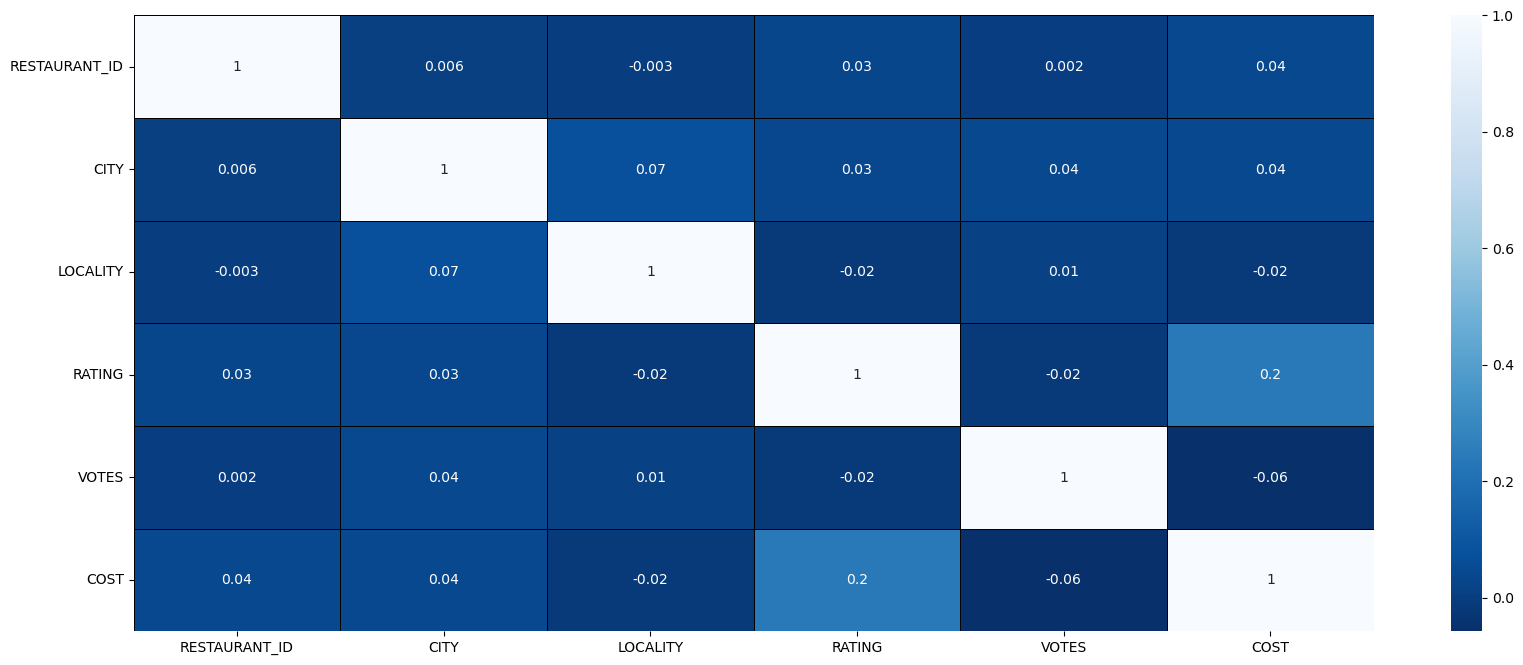

In [694]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,8))
sns.heatmap(train.corr(), linewidths = 0.4, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show()


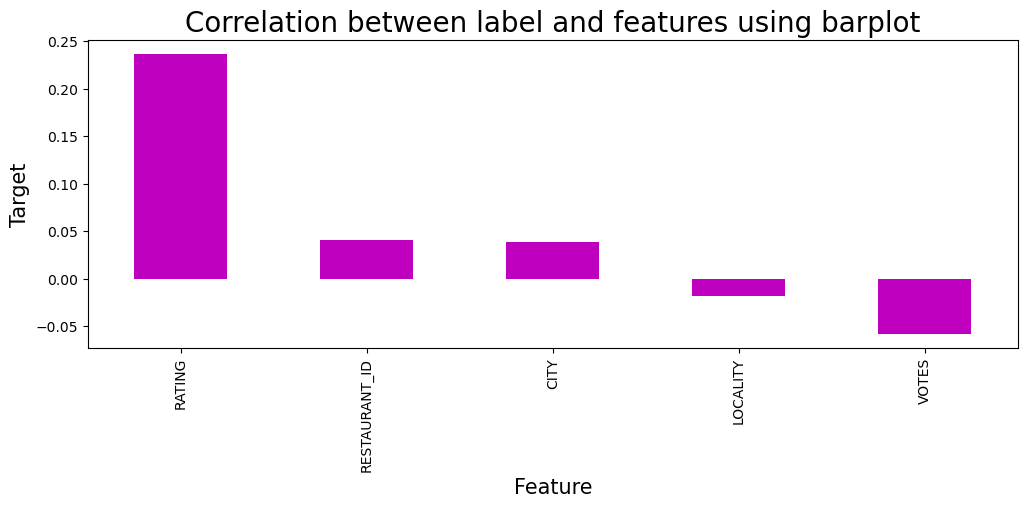

In [695]:
# correlation between label and features using barplot
plt.figure(figsize=(12,4))
train.corr()['COST'].sort_values(ascending=False).drop(['COST']).plot(kind='bar', color="m")
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title("Correlation between label and features using barplot", fontsize = 20)
plt.show()

In [697]:
# Separating features and label
target = train['COST']
train = train.drop('COST', axis=1)

In [698]:
train=pd.get_dummies(train)
train.head

<bound method NDFrame.head of        RESTAURANT_ID  CITY  LOCALITY  RATING  VOTES  TITLE_BAKERY  \
0               9438   320       285      17   1278             0   
1              13198    67      1046      23    950             0   
2              10915    67      1101      19    712             0   
3               6346   222       136      22    787             0   
4              15387   222       620      19    470             0   
...              ...   ...       ...     ...    ...           ...   
12685          13228   131       342      19   1349             0   
12686           9686   222       133      24    191             0   
12687          11133   239      1342      21   1428             0   
12688           6134    67       631      16    996             0   
12689           6430   131      1333      15   1505             0   

       TITLE_BAKERY,BEVERAGE SHOP  TITLE_BAKERY,CAFÉ  \
0                               0                  0   
1                            

In [706]:
from sklearn.model_selection import train_test_split

In [707]:
# Creating the training and testing data sets

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)

In [708]:
# Importing necessory libraries 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [709]:
# Gradient boosting regressor

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [710]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [713]:
pred = gbr.predict(X_val)

In [714]:
# check the accuracy of gredient boosting regressor

print('MAE', mean_absolute_error(y_val, pred))
print('MSE', mean_squared_error(y_val, pred))
print('RMSE',np.sqrt(mean_squared_error(y_val, pred)))

MAE 217.08362678665333
MSE 163795.7812207597
RMSE 404.7169149180198


In [715]:
predict = gbr.predict(X_val)
predict

array([ 370.70224325,  642.84081809, 1328.0998451 , ...,  524.36743108,
       1359.15410113,  357.1290971 ])

In [717]:
# saving the model

import joblib
joblib.dump(gbr, "Restaurant_food_cost.pkl")

['Restaurant_food_cost.pkl']

In [718]:
# Let's load the saved model and get the prediction 

model = joblib.load("Restaurant_food_cost.pkl")

# Prediction 

prediction = model.predict(X_val)
prediction

array([ 370.70224325,  642.84081809, 1328.0998451 , ...,  524.36743108,
       1359.15410113,  357.1290971 ])

In [719]:
# compare actual vs predicted 

a = np.array(y_val)
data = pd.DataFrame()
data["Predicted"]=prediction
data["Original"]=a
data

,Predicted,Original
0,370.702243,400
1,642.840818,1000
2,1328.099845,1300
3,660.336845,600
4,454.617633,500
...,...,...
2533,370.702243,600
2534,490.752894,200
2535,524.367431,1100
2536,1359.154101,1200
